# ANN using Churn-Modeling Dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf


In [26]:
df = pd.read_csv('../Churn_Modeling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.shape

(10000, 14)

In [28]:
# Checking for missing values.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

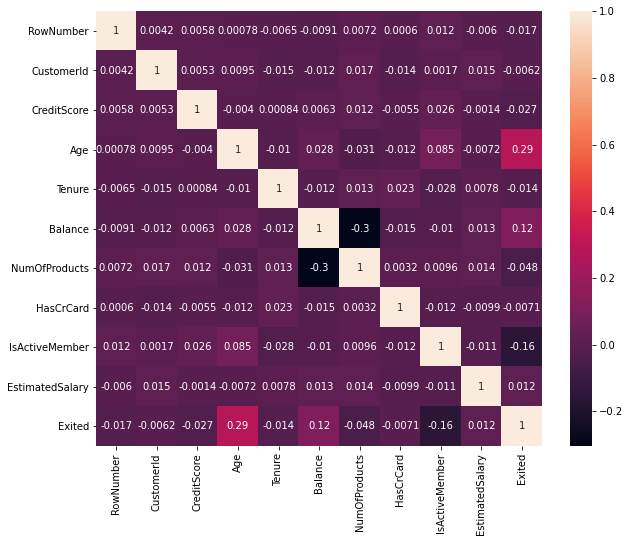

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

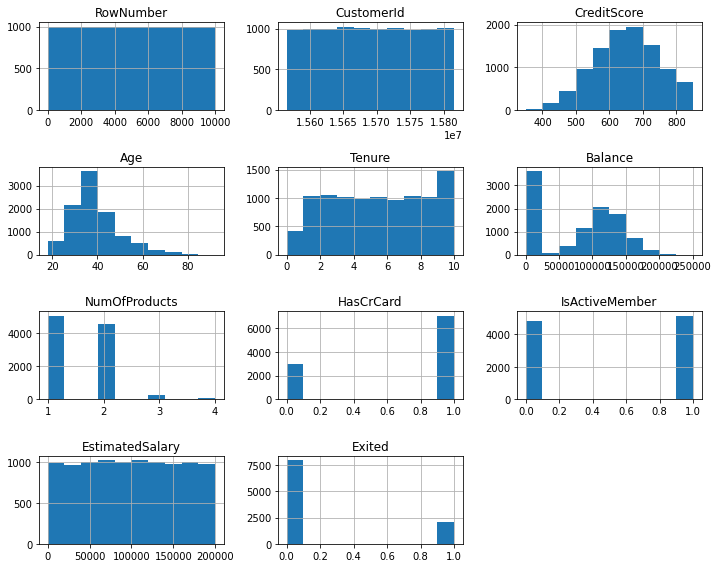

In [30]:
df.hist(figsize=(10,8))
plt.tight_layout() #It prevents overlapping of the figure

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

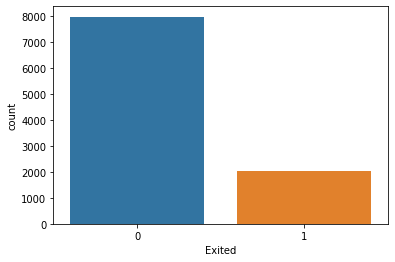

In [31]:
sns.countplot(df['Exited'])

In [32]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [36]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# Data Preprocessing

In [37]:
Geography = pd.get_dummies(df['Geography'],drop_first=True)
Gender = pd.get_dummies(df['Gender'],drop_first=True)

In [38]:
type(Geography),type(Gender) # both are of type data frame 

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [39]:
# Now lets drop the unwanted columns and concatenate the derived columns

df = df.drop(['Geography','Gender','RowNumber','CustomerId','Surname'],axis=1)
df = pd.concat([df,Geography,Gender],axis=1)
df.head() # checking our new dataframe


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [40]:
# Dividing first into independent and dependent features.
X = df.drop('Exited',axis=1)  # Independent variable
y = df['Exited'] # Dependent variable


In [41]:
X.shape,y.shape

((10000, 11), (10000,))

In [42]:
#X = std_scaler.fit_transform(X)

In [43]:
# splitting into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape,X_test.shape

((7500, 11), (2500, 11))

In [46]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1


In [47]:
y_test.head()

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

In [48]:
X_test.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
8764,773,51,8,116197.65,2,1,1,86701.40,1,0,1
4359,545,44,2,127536.44,1,1,0,108398.63,1,0,0
2041,840,39,1,94968.97,1,1,0,84487.62,0,0,0
1108,679,38,7,110555.37,2,1,0,46522.68,1,0,1
3332,735,31,3,119558.35,1,0,0,72927.68,0,0,1


In [49]:
y_test.tail()

8764    0
4359    0
2041    0
1108    0
3332    0
Name: Exited, dtype: int64

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)


In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_dim=11),
    tf.keras.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit(X_train,y_train,batch_size =10,epochs=100,validation_split=0.33)

Train on 5024 samples, validate on 2476 samples
Epoch 1/100
5024/5024 [==============================] - 2s 395us/sample - loss: 0.5529 - accuracy: 0.7548 - val_loss: 0.4844 - val_accuracy: 0.7977
Epoch 2/100
5024/5024 [==============================] - 1s 282us/sample - loss: 0.4677 - accuracy: 0.7958 - val_loss: 0.4608 - val_accuracy: 0.7973
Epoch 3/100
5024/5024 [==============================] - 1s 290us/sample - loss: 0.4460 - accuracy: 0.7956 - val_loss: 0.4459 - val_accuracy: 0.7977
Epoch 4/100
5024/5024 [==============================] - 1s 272us/sample - loss: 0.4328 - accuracy: 0.7962 - val_loss: 0.4366 - val_accuracy: 0.7993
Epoch 5/100
5024/5024 [==============================] - 1s 263us/sample - loss: 0.4237 - accuracy: 0.7992 - val_loss: 0.4305 - val_accuracy: 0.8078
Epoch 6/100
5024/5024 [==============================] - 1s 262us/sample - loss: 0.4149 - accuracy: 0.8165 - val_loss: 0.4247 - val_accuracy: 0.8134
Epoch 7/100
5024/5024 [==============================] - 1

5024/5024 [==============================] - 1s 262us/sample - loss: 0.3285 - accuracy: 0.8641 - val_loss: 0.3562 - val_accuracy: 0.8590
Epoch 56/100
5024/5024 [==============================] - 1s 264us/sample - loss: 0.3289 - accuracy: 0.8637 - val_loss: 0.3556 - val_accuracy: 0.8590
Epoch 57/100
5024/5024 [==============================] - 1s 261us/sample - loss: 0.3289 - accuracy: 0.8623 - val_loss: 0.3571 - val_accuracy: 0.8554
Epoch 58/100
5024/5024 [==============================] - 1s 264us/sample - loss: 0.3286 - accuracy: 0.8617 - val_loss: 0.3585 - val_accuracy: 0.8554
Epoch 59/100
5024/5024 [==============================] - 1s 262us/sample - loss: 0.3281 - accuracy: 0.8666 - val_loss: 0.3570 - val_accuracy: 0.8566
Epoch 60/100
5024/5024 [==============================] - 1s 262us/sample - loss: 0.3284 - accuracy: 0.8648 - val_loss: 0.3578 - val_accuracy: 0.8574
Epoch 61/100
5024/5024 [==============================] - 1s 260us/sample - loss: 0.3290 - accuracy: 0.8617 - val

# Plotting the Accuracy and Loss

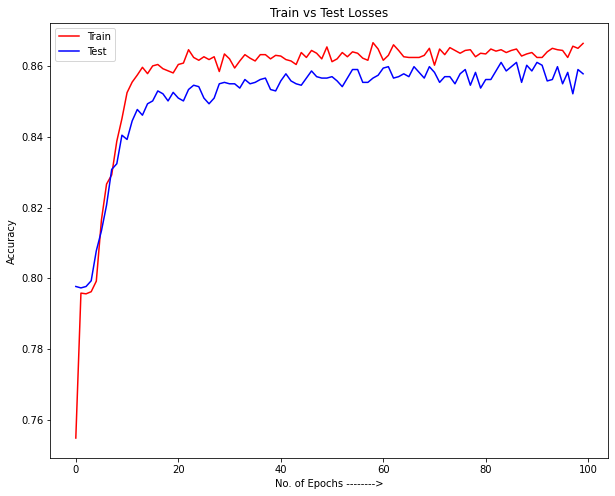

In [53]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'b')
plt.title('Train vs Test Losses')
plt.xlabel('No. of Epochs -------->')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')

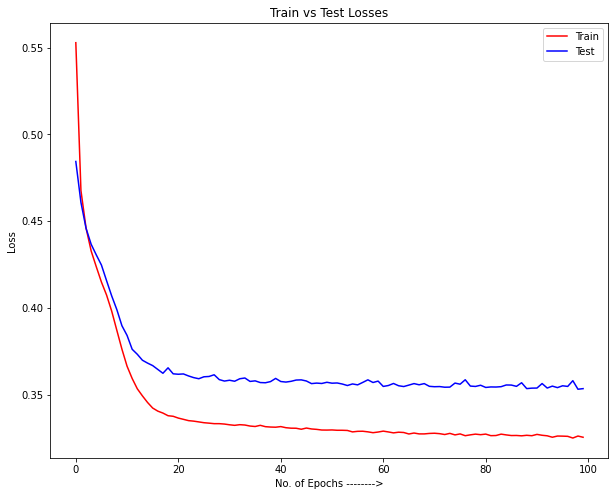

In [54]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.title('Train vs Test Losses')
plt.xlabel('No. of Epochs -------->')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='best')

# Model Evaluation

In [64]:
# Prediction of the test data
y_pred = model.predict(X_test)
y_pred


array([[0.2732438 ],
       [0.34919196],
       [0.13349015],
       ...,
       [0.29089102],
       [0.17442705],
       [0.07055206]], dtype=float32)

In [66]:
y_pred = y_pred>0.5 
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[1866  125]
 [ 227  282]]


<AxesSubplot:>

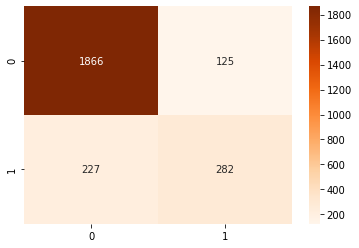

In [72]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='g',annot=True,cmap='Oranges')

In [75]:
# checking the accuracy score

from sklearn.metrics import accuracy_score
print('The Accuracy is  : {} %'.format(accuracy_score(y_test,y_pred)*100))

The Accuracy is  : 85.92 %


In [76]:
def predict_churn(values) :
    
    x = np.array(values) # our input is in a form of list so converttransformnto an array
    x = x.reshape(1,-1) # because our values is a 1 list containing all the input parameters
    x = std_scaler.transform(x) # transforming the values
    
    return model.predict(x)
    

### Testing with our custom data

In [91]:
# You can basically try with different other values ...take it manually from the X_test data
#values = [523, 40, 2,102967.41, 1, 1, 0,128702.10, 0, 0, 0]


values = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]

res = predict_churn(values)

if res > 0.5 :
    print('High chances of exiting!!')
else:
    print('Not exiting !!')

High chances of exiting!!


In [93]:
values = [679, 38, 7,110555.37, 2, 1, 0,46522.68, 1, 0, 1]
res = predict_churn(values)

if res > 0.5 :
    print('High chances of exiting!!')
else:
    print('Low chances exiting !!')


Low chances exiting !!
